In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('3_df_pak.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_title_short        1371 non-null   object 
 1   job_title              1371 non-null   object 
 2   job_location           1371 non-null   object 
 3   job_via                1371 non-null   object 
 4   job_schedule_type      1370 non-null   object 
 5   job_work_from_home     1371 non-null   bool   
 6   search_location        1371 non-null   object 
 7   job_posted_date        1371 non-null   object 
 8   job_no_degree_mention  1371 non-null   bool   
 9   job_health_insurance   1371 non-null   bool   
 10  job_country            1371 non-null   object 
 11  salary_rate            12 non-null     object 
 12  salary_year_avg        10 non-null     float64
 13  salary_hour_avg        1 non-null      float64
 14  company_name           1371 non-null   object 
 15  job_

In [3]:
df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Data Engineer,Data Science Engineer (Remote Job for Japan Co...,"Karachi, Pakistan",via Indeed,Full-time,False,Pakistan,2023-03-01 13:19:38,False,False,Pakistan,NaN,NaN,NaN,TouchPoint,"['java', 'scala', 'python', 'sql']","{'programming': ['java', 'scala', 'python', 's..."
1,Data Engineer,Senior Consultant - Data Engineer,Pakistan,via Jooble,Full-time,False,Pakistan,2023-09-13 13:14:17,True,False,Pakistan,NaN,NaN,NaN,"ThoughtWorks, Inc.","['nosql', 'cassandra', 'aws', 'azure', 'kafka'...","{'cloud': ['aws', 'azure'], 'databases': ['cas..."
2,Machine Learning Engineer,Machine Learning Engineer,"Islamabad, Pakistan",via Indeed,Full-time,False,Pakistan,2023-05-25 13:30:41,False,False,Pakistan,NaN,NaN,NaN,eMumba,"['python', 'go', 'pandas', 'scikit-learn']","{'libraries': ['pandas', 'scikit-learn'], 'pro..."


In [4]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        1371 non-null   object        
 1   job_title              1371 non-null   object        
 2   job_location           1371 non-null   object        
 3   job_via                1371 non-null   object        
 4   job_schedule_type      1370 non-null   object        
 5   job_work_from_home     1371 non-null   bool          
 6   search_location        1371 non-null   object        
 7   job_posted_date        1371 non-null   datetime64[ns]
 8   job_no_degree_mention  1371 non-null   bool          
 9   job_health_insurance   1371 non-null   bool          
 10  job_country            1371 non-null   object        
 11  salary_rate            12 non-null     object        
 12  salary_year_avg        10 non-null     float64       
 13  sal

In [6]:
from eda_functions import convert_job_skills
df['job_skills'] = df['job_skills'].apply(convert_job_skills)

unique_types = df['job_skills'].apply(type).unique()
unique_types

array([<class 'list'>, <class 'float'>], dtype=object)

In [7]:
df_skills_pak = df.explode('job_skills')
df_skills_pak.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Data Engineer,Data Science Engineer (Remote Job for Japan Co...,"Karachi, Pakistan",via Indeed,Full-time,False,Pakistan,2023-03-01 13:19:38,False,False,Pakistan,NaN,NaN,NaN,TouchPoint,java,"{'programming': ['java', 'scala', 'python', 's..."
0,Data Engineer,Data Science Engineer (Remote Job for Japan Co...,"Karachi, Pakistan",via Indeed,Full-time,False,Pakistan,2023-03-01 13:19:38,False,False,Pakistan,NaN,NaN,NaN,TouchPoint,scala,"{'programming': ['java', 'scala', 'python', 's..."
0,Data Engineer,Data Science Engineer (Remote Job for Japan Co...,"Karachi, Pakistan",via Indeed,Full-time,False,Pakistan,2023-03-01 13:19:38,False,False,Pakistan,NaN,NaN,NaN,TouchPoint,python,"{'programming': ['java', 'scala', 'python', 's..."


In [8]:
# Group by job_skills and job_title_short and count the number of occurrences
df_skills_count = df_skills_pak.groupby(['job_skills', 'job_title_short']).size()

# Name the count column as count
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
570,sql,Data Engineer,319
442,python,Data Engineer,273
35,aws,Data Engineer,186
443,python,Data Scientist,174
571,sql,Data Scientist,146
...,...,...,...
308,looker,Data Scientist,1
309,looker,Machine Learning Engineer,1
313,mariadb,Data Engineer,1
315,mariadb,Machine Learning Engineer,1


In [9]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles =job_titles[:4]

job_titles

['Data Engineer',
 'Data Scientist',
 'Machine Learning Engineer',
 'Data Analyst']

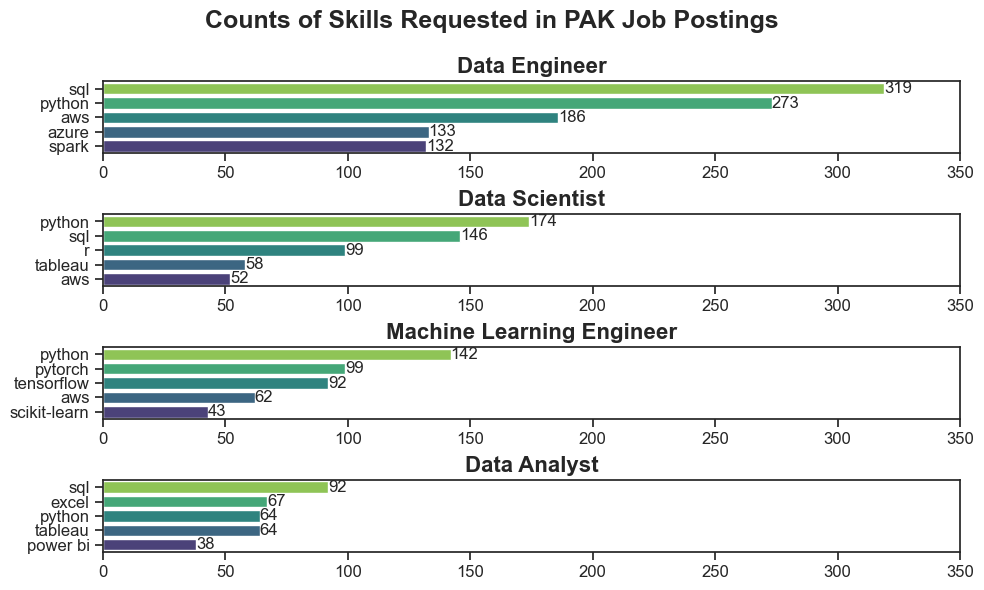

In [28]:
# Create subplots based on the number of job titles
fig, ax = plt.subplots(len(job_titles), 1, figsize=(10, len(job_titles) * 1.5))

# Set the theme for consistency
sns.set_theme(style='ticks')

# Loop through each job title and create a bar plot
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    
    # Create a color palette based on viridis
    n_colors = len(df_plot)
    palette = sns.color_palette("viridis", n_colors)
    
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], palette=palette)
    ax[i].set_title(job_title, fontsize=16, fontweight='bold')
    ax[i].invert_yaxis()
    ax[i].set_ylabel('', fontsize=14)
    ax[i].set_xlabel('')
    ax[i].tick_params(axis='x', labelsize=12)
    ax[i].tick_params(axis='y', labelsize=12)
    ax[i].set_xlim(0, 350)  # Make the scales the same

    # Annotate each bar with the count value
    for container in ax[i].containers:
        ax[i].bar_label(container, fmt='%d', label_type='edge', fontsize=12)

# Set the super title for the figure
fig.suptitle('Counts of Skills Requested in PAK Job Postings', fontsize=18, fontweight='bold')

# Adjust layout to fix overlap
fig.tight_layout(h_pad=0.5)

# Show the plot
plt.show()

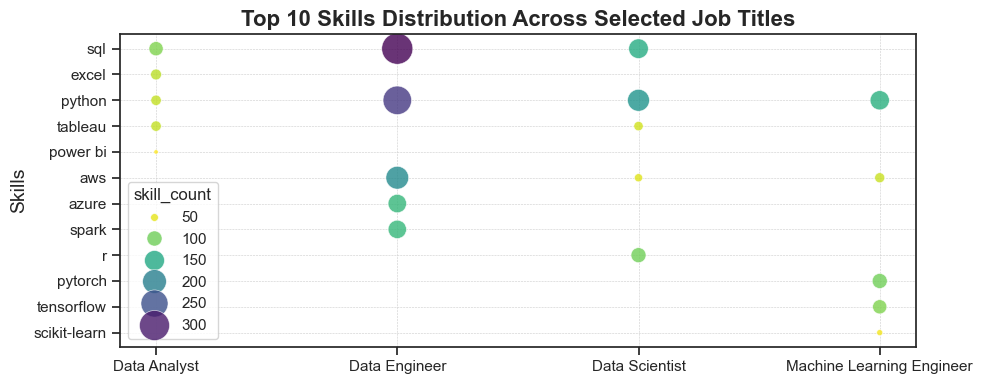

In [67]:

# Extract job titles to use
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = job_titles[:4]

# Filter the DataFrame to include only the top 10 skills for the selected job titles
top_skills_per_job = df_skills_count[df_skills_count['job_title_short'].isin(job_titles)]
top_skills_per_job = top_skills_per_job.groupby('job_title_short').apply(lambda x: x.nlargest(5, 'skill_count')).reset_index(drop=True)

# Create the bubble plot
plt.figure(figsize=(10, 4))
sns.scatterplot(data=top_skills_per_job, x='job_title_short', y='job_skills', size='skill_count', hue='skill_count', palette=sns.color_palette("viridis_r", as_cmap=True), sizes=(10, 500), alpha=0.8)

plt.title('Top 10 Skills Distribution Across Selected Job Titles', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Skills', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.4)

plt.tight_layout()

plt.show()


Counts don't show what portions of jobs are requesting these skills.
So we will change these to percentages.

In [11]:
#First we will get the number of jobs for each job title
df_job_title_count = df['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Engineer,444
1,Data Scientist,277
2,Data Analyst,197
3,Machine Learning Engineer,163
4,Senior Data Engineer,109
5,Business Analyst,85
6,Senior Data Scientist,72
7,Senior Data Analyst,24


We will merge df_skills_counta and df_job_title_count to make percentage calcultion easier.


In [12]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')
df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc


,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,319,444,71.846847
1,python,Data Engineer,273,444,61.486486
2,aws,Data Engineer,186,444,41.891892
3,python,Data Scientist,174,277,62.815884
4,sql,Data Scientist,146,277,52.707581
...,...,...,...,...,...
653,looker,Data Scientist,1,277,0.361011
654,looker,Machine Learning Engineer,1,163,0.613497
655,mariadb,Data Engineer,1,444,0.225225
656,mariadb,Machine Learning Engineer,1,163,0.613497


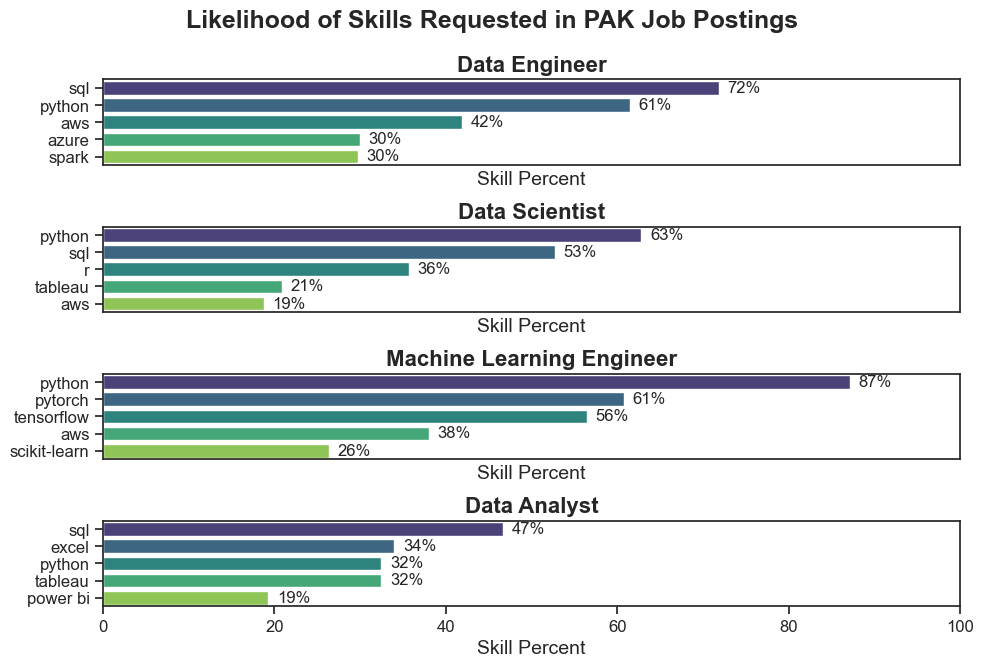

In [73]:
# Create subplots based on the number of job titles
fig, ax = plt.subplots(len(job_titles), 1, figsize=(10, len(job_titles) * 1.7))

# Loop through each job title and create a bar plot
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    
    # Create a color palette based on viridis
    n_colors = len(df_plot)
    palette = sns.color_palette("viridis", n_colors)
    
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], palette=palette)
    ax[i].set_title(job_title, fontsize=16, fontweight='bold')
    ax[i].set_ylabel('', fontsize=14)
    ax[i].set_xlabel('Skill Percent', fontsize=14)
    ax[i].tick_params(axis='x', labelsize=12)
    ax[i].tick_params(axis='y', labelsize=12)
    ax[i].set_xlim(0, 100)
    
    # Remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])
    
    # Label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center', fontsize=12)

# Set the super title for the figure
fig.suptitle('Likelihood of Skills Requested in PAK Job Postings', fontsize=18, fontweight='bold')

# Adjust layout to fix overlap
fig.tight_layout(h_pad=0.8)

# Show the plot
plt.show()

In [14]:
# Create the pivot table
pivot_table = df_skills_perc.pivot_table(
    index='job_skills',        # Rows: skills
    columns='job_title_short', # Columns: job titles
    values='skill_percent',    # Values: skill percentage
    aggfunc='mean',            # Aggregate function (mean)
    fill_value=0               # Fill NaN values with 0
)
pivot_table

job_title_short,Business Analyst,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist
job_skills,,,,,,,,
airflow,0.000000,1.522843,18.468468,0.722022,4.907975,0.000000,22.018349,1.388889
alteryx,5.882353,3.553299,1.576577,2.166065,0.000000,4.166667,0.917431,0.000000
angular,0.000000,0.000000,0.000000,0.722022,0.000000,0.000000,0.917431,0.000000
ansible,2.352941,0.000000,0.900901,1.083032,1.226994,0.000000,0.000000,0.000000
arch,0.000000,0.000000,0.000000,0.361011,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
webex,1.176471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
windows,3.529412,1.522843,2.252252,0.000000,0.613497,0.000000,0.917431,0.000000
word,4.705882,4.568528,0.900901,1.805054,1.226994,8.333333,0.000000,1.388889


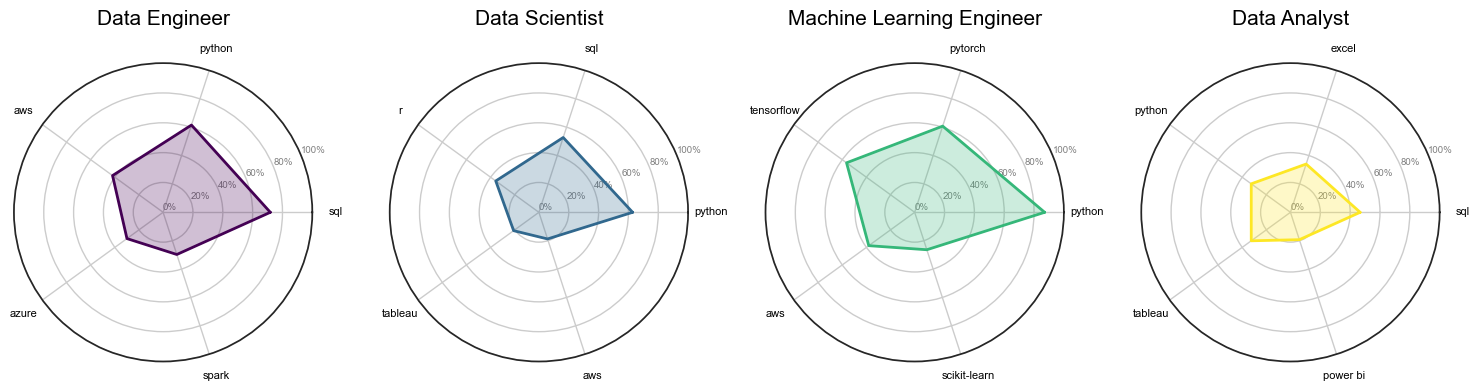

In [71]:
# Specify the job titles to include
desired_job_titles = ['Data Engineer', 'Data Scientist', 'Machine Learning Engineer', 'Data Analyst']

# Filter the pivot table to include only the specified job titles
pivot_table = pivot_table[desired_job_titles]

# Function to create radar chart
def create_radar_chart(ax, data, labels, title, color):
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    
    # Ensure data is a full circle
    values = data.tolist()
    values += values[:1]
    
    # Normalize values to fit radar chart range
    max_value = 100  # Assuming skill_percent is in percentage
    values = [v / max_value * 100 for v in values]  # Normalize to 0-100
    
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid', label=title)
    ax.fill(angles, values, color=color, alpha=0.25)
    ax.set_yticks(np.arange(0, 101, 20))
    ax.set_yticklabels([f'{i}%' for i in np.arange(0, 101, 20)], color='grey', size=7)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, color='black', size=8)
    ax.set_title(title, size=15, color='black', y=1.1)

# Create radar charts for each job title
num_titles = len(desired_job_titles)

# Create subplots
fig, axs = plt.subplots(ncols=num_titles, nrows=1, figsize=(15, 5), subplot_kw=dict(polar=True))

# Define color map
import matplotlib.cm as cm
cmap = cm.get_cmap('viridis', num_titles)

# Loop through each job title
for i, job_title in enumerate(desired_job_titles):
    # Get top 5 skills based on skill_percent
    df_sorted = pivot_table[[job_title]].sort_values(by=job_title, ascending=False)
    top_skills = df_sorted.head(5)
    
    # Prepare data for radar chart
    data = top_skills[job_title].values
    labels = top_skills.index.tolist()
    
    # Create radar chart
    create_radar_chart(axs[i], data, labels, job_title, cmap(i))

# Adjust layout
plt.tight_layout()
plt.show()

In [16]:

df['job_posted_month_no'] = df['job_posted_date'].dt.month

# Explode job_skills column
df_explode = df.explode('job_skills')
df_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
0,Data Engineer,Data Science Engineer (Remote Job for Japan Co...,"Karachi, Pakistan",via Indeed,Full-time,False,Pakistan,2023-03-01 13:19:38,False,False,Pakistan,NaN,NaN,NaN,TouchPoint,java,"{'programming': ['java', 'scala', 'python', 's...",3
0,Data Engineer,Data Science Engineer (Remote Job for Japan Co...,"Karachi, Pakistan",via Indeed,Full-time,False,Pakistan,2023-03-01 13:19:38,False,False,Pakistan,NaN,NaN,NaN,TouchPoint,scala,"{'programming': ['java', 'scala', 'python', 's...",3
0,Data Engineer,Data Science Engineer (Remote Job for Japan Co...,"Karachi, Pakistan",via Indeed,Full-time,False,Pakistan,2023-03-01 13:19:38,False,False,Pakistan,NaN,NaN,NaN,TouchPoint,python,"{'programming': ['java', 'scala', 'python', 's...",3
0,Data Engineer,Data Science Engineer (Remote Job for Japan Co...,"Karachi, Pakistan",via Indeed,Full-time,False,Pakistan,2023-03-01 13:19:38,False,False,Pakistan,NaN,NaN,NaN,TouchPoint,sql,"{'programming': ['java', 'scala', 'python', 's...",3
1,Data Engineer,Senior Consultant - Data Engineer,Pakistan,via Jooble,Full-time,False,Pakistan,2023-09-13 13:14:17,True,False,Pakistan,NaN,NaN,NaN,"ThoughtWorks, Inc.",nosql,"{'cloud': ['aws', 'azure'], 'databases': ['cas...",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,Data Engineer,Data Engineer - Datastage Consultant,"Islamabad, Pakistan",via LinkedIn Pakistan,Full-time,False,Pakistan,2023-01-18 06:18:01,False,False,Pakistan,NaN,NaN,NaN,Teradata,unix,"{'cloud': ['azure', 'aws'], 'databases': ['mon...",1
1369,Data Engineer,Data Engineer - Datastage Consultant,"Islamabad, Pakistan",via LinkedIn Pakistan,Full-time,False,Pakistan,2023-01-18 06:18:01,False,False,Pakistan,NaN,NaN,NaN,Teradata,linux,"{'cloud': ['azure', 'aws'], 'databases': ['mon...",1
1369,Data Engineer,Data Engineer - Datastage Consultant,"Islamabad, Pakistan",via LinkedIn Pakistan,Full-time,False,Pakistan,2023-01-18 06:18:01,False,False,Pakistan,NaN,NaN,NaN,Teradata,jenkins,"{'cloud': ['azure', 'aws'], 'databases': ['mon...",1
1369,Data Engineer,Data Engineer - Datastage Consultant,"Islamabad, Pakistan",via LinkedIn Pakistan,Full-time,False,Pakistan,2023-01-18 06:18:01,False,False,Pakistan,NaN,NaN,NaN,Teradata,git,"{'cloud': ['azure', 'aws'], 'databases': ['mon...",1


In [17]:
# Group by month and job_skills
df_pivot = df_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_pivot

job_skills,airflow,alteryx,angular,ansible,arch,asana,asp.net,asp.net core,assembly,atlassian,...,vba,visio,vmware,vue.js,watson,webex,windows,word,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,15,2,1,1,1,0,0,0,0,1,...,2,0,1,1,0,0,1,3,2,1
2,7,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,5,1,0
3,14,2,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,3,3,1,0
4,6,2,0,3,0,0,0,0,0,0,...,0,1,1,0,0,0,4,2,0,0
5,9,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
6,6,0,1,0,0,0,1,0,0,1,...,1,0,0,0,1,0,1,1,0,0
7,6,6,0,2,0,1,3,1,0,1,...,2,2,1,0,0,0,2,3,0,0
8,13,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
9,5,1,0,0,0,0,0,0,0,2,...,0,1,0,0,0,1,1,3,0,1


In [18]:
# sorts by count
df_pivot.loc['Total'] = df_pivot.sum()
df_pivot = df_pivot[df_pivot.loc['Total'].sort_values(ascending=False).index]
df_pivot = df_pivot.drop('Total')

df_pivot

job_skills,python,sql,aws,azure,spark,tableau,r,java,hadoop,excel,...,datarobot,dlib,perl,firestore,graphql,solidity,openstack,smartsheet,shogun,mlr
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,103,103,43,32,29,35,34,38,30,20,...,0,0,0,1,0,1,0,0,0,1
2,59,57,21,17,16,20,14,24,13,14,...,0,0,1,0,0,0,0,0,0,0
3,63,63,30,25,22,12,15,16,19,15,...,0,1,0,0,0,0,1,0,0,0
4,34,47,18,13,13,13,8,10,6,12,...,0,0,0,0,0,0,0,0,0,0
5,48,45,26,24,22,10,16,12,11,4,...,0,0,0,0,0,0,0,0,1,0
6,54,57,19,14,20,15,18,18,16,10,...,0,0,0,0,0,0,0,0,0,0
7,56,56,29,20,16,16,14,5,8,19,...,0,0,0,0,0,0,0,1,0,0
8,47,45,28,15,15,17,13,12,7,5,...,0,0,0,0,0,0,0,0,0,0
9,68,49,27,25,22,25,21,17,16,15,...,0,0,0,0,0,0,0,0,0,0


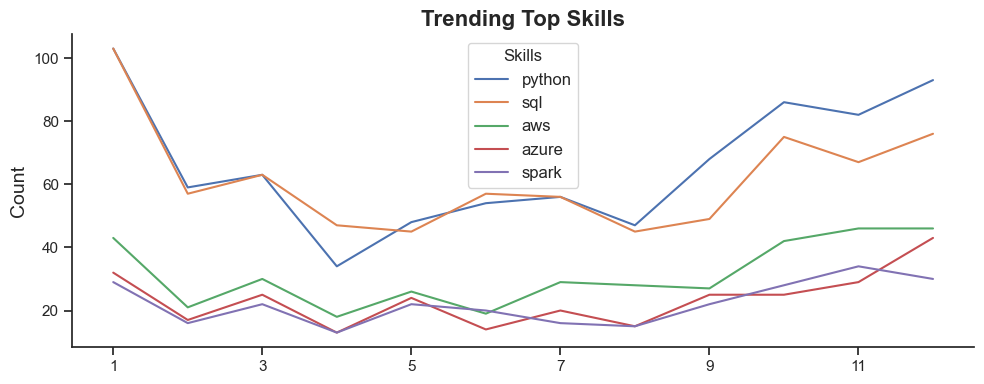

In [83]:
# Create a figure and a single subplot (axes)
fig, ax = plt.subplots(figsize=(10, 4))

# Plot the first 5 columns of df_pivot as lines
df_pivot.iloc[:, :5].plot(kind='line', ax=ax)

# Customize the plot
ax.set_title('Trending Top Skills', fontsize=16, fontweight='bold')
ax.set_ylabel('Count', fontsize=14)
ax.set_xlabel('', fontsize=14)
ax.legend(title='Skills', fontsize=12)
sns.despine() 


# Adjust layout to make sure everything fits
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
# Get monthly totals
DA_totals = df.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     179
2      95
3     137
4      79
5      78
6      90
7     105
8      78
9     123
10    143
11    131
12    133
dtype: int64

In [21]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_percent = df_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_percent = df_percent.reset_index()
df_percent['job_posted_month'] = df_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_percent = df_percent.set_index('job_posted_month')
df_percent = df_percent.drop(columns='job_posted_month_no')

df_percent

job_skills,python,sql,aws,azure,spark,tableau,r,java,hadoop,excel,...,datarobot,dlib,perl,firestore,graphql,solidity,openstack,smartsheet,shogun,mlr
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,57.541899,57.541899,24.022346,17.877095,16.201117,19.553073,18.994413,21.229050,16.759777,11.173184,...,0.000000,0.000000,0.000000,0.558659,0.000000,0.558659,0.000000,0.000000,0.000000,0.558659
Feb,62.105263,60.000000,22.105263,17.894737,16.842105,21.052632,14.736842,25.263158,13.684211,14.736842,...,0.000000,0.000000,1.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,45.985401,45.985401,21.897810,18.248175,16.058394,8.759124,10.948905,11.678832,13.868613,10.948905,...,0.000000,0.729927,0.000000,0.000000,0.000000,0.000000,0.729927,0.000000,0.000000,0.000000
Apr,43.037975,59.493671,22.784810,16.455696,16.455696,16.455696,10.126582,12.658228,7.594937,15.189873,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,61.538462,57.692308,33.333333,30.769231,28.205128,12.820513,20.512821,15.384615,14.102564,5.128205,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.282051,0.000000
Jun,60.000000,63.333333,21.111111,15.555556,22.222222,16.666667,20.000000,20.000000,17.777778,11.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,53.333333,53.333333,27.619048,19.047619,15.238095,15.238095,13.333333,4.761905,7.619048,18.095238,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.952381,0.000000,0.000000
Aug,60.256410,57.692308,35.897436,19.230769,19.230769,21.794872,16.666667,15.384615,8.974359,6.410256,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,55.284553,39.837398,21.951220,20.325203,17.886179,20.325203,17.073171,13.821138,13.008130,12.195122,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


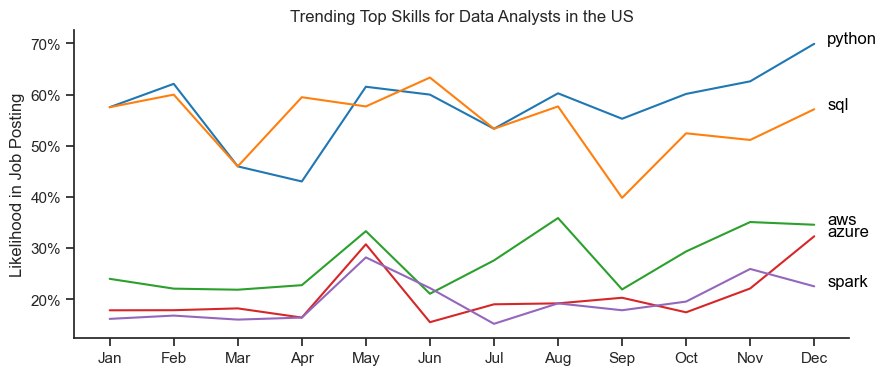

In [84]:
from matplotlib.ticker import PercentFormatter

df_plot = df_percent.iloc[:, :5]
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
sns.despine() 


# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()